In [6]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import galois

C:\Users\Alex\AppData\Roaming\Python\Python39\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [7]:
# Define the field
GF = galois.GF(256)

In [11]:
GF(5)+GF(13)

GF(8, order=2^8)

In [15]:
# Galois Field
MODULO = 0b100011101

def GF_256_log_antilog_table_generator():
    """ 
    2^n = x
    alpha^n = x
    log_table[n] = x
    antilog_table[x] = n
    the log_table takes the exponent 'n' and returns the integer 'x'
    the antilog_table takes the Integer 'x' and returns the exponent 'n'
    """
    log_table = [2**0]
    antilog_table = [None] * 256

    for power in range(1, 256):
        res = log_table[power-1]*2
        if res >= 256:
            res ^= MODULO

        log_table.append(res)
        # print(f"{power}\t{res}")

    for index, value in enumerate(log_table[:-1]):
        antilog_table[value] = index
    
    return log_table, antilog_table

log_table, antilog_table = GF_256_log_antilog_table_generator()

assert log_table[:50] == [1, 2, 4, 8, 16, 32, 64, 128, 29, 58, 116, 232, 205, 135, 19, 38, 76, 152, 45, 90, 180, 117, 234, 201, 143, 3, 6, 12, 24, 48, 96, 192, 157, 39, 78, 156, 37, 74, 148, 53, 106, 212, 181, 119, 238, 193, 159, 35, 70, 140]
assert antilog_table[:50] == [None, 0, 1, 25, 2, 50, 26, 198, 3, 223, 51, 238, 27, 104, 199, 75, 4, 100, 224, 14, 52, 141, 239, 129, 28, 193, 105, 248, 200, 8, 76, 113, 5, 138, 101, 47, 225, 36, 15, 33, 53, 147, 142, 218, 240, 18, 130, 69, 29, 181]

In [16]:
# multiplication in the Galois Field:
"""
c = a * b
c = 2**antilog(a) * 2**antilog(b)
c = 2**(antilog(a) + antilog(b))
c = log(antilog(a) + antilog(b)%255)
"""

def gf_mul(a, b):
    if a == 0 or b == 0:
        return 0
    exponent = antilog_table[a]+antilog_table[b]
    # print(f"{exponent=} {exponent%255=}")
    return log_table[exponent%255]

assert gf_mul(16, 32) == 58
assert gf_mul(215, 198) == 240
assert gf_mul(50, 46) == 47

In [17]:
def incorrect_gf_mul(a, b):
    # this code is by chatGPT and is working incorrectly
    # e.g. incorrect_gf_mul(139, 5) outputs 657, which is not correct
    p = 0
    for i in range(8):
        if b & 1:
            p ^= a
        hi_bit_set = a & 0x80
        a <<= 1
        if hi_bit_set:
            a ^= 0x1B
        b >>= 1
    return p

In [18]:
result = np.zeros((size, size))
plt.imshow(result)

NameError: name 'size' is not defined

In [20]:
def correct(x, y):
    return gf_mul(x, y)

def correct_part2(x, y):
    # if GF(x) * GF(y) != gf_mul(x, y):
    #     print(f"{GF(x) * GF(y)=} != {gf_mul(x, y)}")

    return x^y
    # return GF(x) + GF(y)
    # return GF(x) * GF(y)

def incorrect(x, y):
    return incorrect_gf_mul(x, y)

x_values = np.arange(256)
y_values = np.arange(256)

f_vectorized = np.vectorize(correct)
correct_result = f_vectorized(x_values[:, np.newaxis], y_values[np.newaxis, :])

f_vectorized = np.vectorize(incorrect)
incorrect_result = f_vectorized(x_values[:, np.newaxis], y_values[np.newaxis, :])

f_vectorized = np.vectorize(correct_part2)
correct_part2_result = f_vectorized(x_values[:, np.newaxis], y_values[np.newaxis, :])

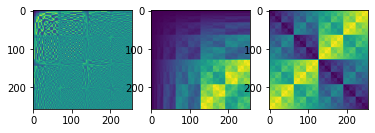

In [21]:
fig, axs = plt.subplots(1, 3)

axs[0].imshow(correct_result)
axs[1].imshow(incorrect_result)
axs[2].imshow(correct_part2_result)
plt.show()

In [22]:
cmap = plt.cm.viridis  # example colormap
result_colormapped = cmap(correct_part2_result, bytes=True)  # apply colormap to data

In [ ]:
# img = Image.fromarray(correct_result)
img = Image.fromarray(result_colormapped)
# img = img.convert('L')
img.save("GF256_addition_matrix.png")

In [ ]:


# Define the two numbers to be multiplied
a = GF(123)
b = GF(45)

# Multiply the two numbers
c = a * b

# Print the result
print(c)

C:\Users\Alex\AppData\Roaming\Python\Python39\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


174


In [5]:
alpha = 256
0 <= alpha <= 255

False